# Clustering Analysis for Shop Customers Segmentation

## About Dataset
Shop Customer Data is a detailed analysis of a imaginative shop's ideal customers. It helps a business to better understand its customers. The owner of a shop gets information about Customers through membership cards.

Dataset consists of 2000 records and 8 columns:
- Customer ID
- Gender
- Age
- Annual Income
- Spending Score (Score assigned by the shop, based on customer behavior and spending nature)
- Profession
- Work Experience (In years)
- Family Size

# Objective

The primary objective of the clustering analysis on the Shop Customer Data is to discern distinct customer segments within the dataset, utilizing features such as demographics, spending behavior, profession, and family size. Through the application of clustering algorithms, the aim is to uncover patterns and similarities among customers, facilitating targeted marketing strategies, personalized customer engagement, and optimized resource allocation. This analysis seeks to empower the shop with actionable insights into customer preferences, enabling the tailoring of product offerings, pricing strategies, and promotional campaigns to specific clusters. Ultimately, the goal is to enhance customer satisfaction, loyalty, and overall business performance by leveraging a nuanced understanding of the diverse characteristics and needs within the customer base.

# Training Model
- K-means Clustering

# Environment Preparation

## Import software libraries

In [1]:
import sys                                                  # Read system parameters.
import numpy as np 
import pandas as pd                                         # Manipulate and analyze data.
import matplotlib                                           # Create and format charts.
import matplotlib.pyplot as plt
import seaborn as sns                                       # Make charting easier.
import yellowbrick                                          # Visualize elbow and silhouette plots.
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
import sklearn                                              # Train and evaluate machine learning models.
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from collections import Counter                             # Count objects in containers.
import pickle                                               # Save Python objects as binary files.
import warnings                                             # Suppress warnings.
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
import category_encoders as ce 

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))
print('- Category Encoders {}'.format(ce.__version__))
print('- Yellowbrick {}'.format(yellowbrick.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))

Libraries used in this project:
- Python 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
- pandas 1.5.3
- Matplotlib 3.7.0
- Seaborn 0.12.2
- Category Encoders 2.6.3
- Yellowbrick 1.5
- scikit-learn 1.2.2


# Data Preparation

## Load and preview the data

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv(R"C:\Users\Dell\Downloads\clustering\Shop Customer Data\Customers.csv")
data.head(5)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


## Check the shape of the data

In [3]:
data.shape

(2000, 8)

## Check the unique number of columns

In [4]:
data.nunique()

CustomerID                2000
Gender                       2
Age                        100
Annual Income ($)         1786
Spending Score (1-100)     101
Profession                   9
Work Experience             18
Family Size                  9
dtype: int64

## Check the data types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


## Generate summary statistics for all of the data

In [6]:
data.describe(datetime_is_numeric = True, include = 'all')

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
count,2000.000000,2000,2000.000000,2000.000000,2000.000000,1965,2000.000000,2000.000000
unique,NaN,2,NaN,NaN,NaN,9,NaN,NaN
top,NaN,Female,NaN,NaN,NaN,Artist,NaN,NaN
freq,NaN,1186,NaN,NaN,NaN,612,NaN,NaN
mean,1000.500000,NaN,48.960000,110731.821500,50.962500,NaN,4.102500,3.768500
std,577.494589,NaN,28.429747,45739.536688,27.934661,NaN,3.922204,1.970749
min,1.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,1.000000
25%,500.750000,NaN,25.000000,74572.000000,28.000000,NaN,1.000000,2.000000
50%,1000.500000,NaN,48.000000,110045.000000,50.000000,NaN,3.000000,4.000000
75%,1500.250000,NaN,73.000000,149092.750000,75.000000,NaN,7.000000,5.000000


## Count column values

In [7]:
for column in data.columns:
    value_counts = data[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for CustomerID:
1       1
1330    1
1343    1
1342    1
1341    1
       ..
662     1
661     1
660     1
659     1
2000    1
Name: CustomerID, Length: 2000, dtype: int64

Value counts for Gender:
Female    1186
Male       814
Name: Gender, dtype: int64

Value counts for Age:
31    31
32    30
52    30
91    29
63    28
      ..
42    12
10    12
77    12
71    12
98     9
Name: Age, Length: 100, dtype: int64

Value counts for Annual Income ($):
50000     7
9000      7
97000     6
85000     6
4000      6
         ..
111859    1
186655    1
164598    1
132951    1
110610    1
Name: Annual Income ($), Length: 1786, dtype: int64

Value counts for Spending Score (1-100):
49    34
42    33
55    32
17    31
46    28
      ..
72    12
6     12
9     12
95    12
0      2
Name: Spending Score (1-100), Length: 101, dtype: int64

Value counts for Profession:
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153


## Identify missing values

In [8]:
data.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

# Data Cleaning

In [9]:
# Drop missing values

In [10]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1965 non-null   int64 
 1   Gender                  1965 non-null   object
 2   Age                     1965 non-null   int64 
 3   Annual Income ($)       1965 non-null   int64 
 4   Spending Score (1-100)  1965 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         1965 non-null   int64 
 7   Family Size             1965 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 138.2+ KB


## Change Column Names

In [11]:
new_column_names = ['id', 'gender', 'age', 'annual_income', 'spending_score', 'profession', 'work_experience', 'family_size']
data.columns = new_column_names
data.head()

,id,gender,age,annual_income,spending_score,profession,work_experience,family_size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


## Drop `id` column

In [12]:
data = data.drop(columns=['id'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           1965 non-null   object
 1   age              1965 non-null   int64 
 2   annual_income    1965 non-null   int64 
 3   spending_score   1965 non-null   int64 
 4   profession       1965 non-null   object
 5   work_experience  1965 non-null   int64 
 6   family_size      1965 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 122.8+ KB


## Plot histograms for all numerical columns

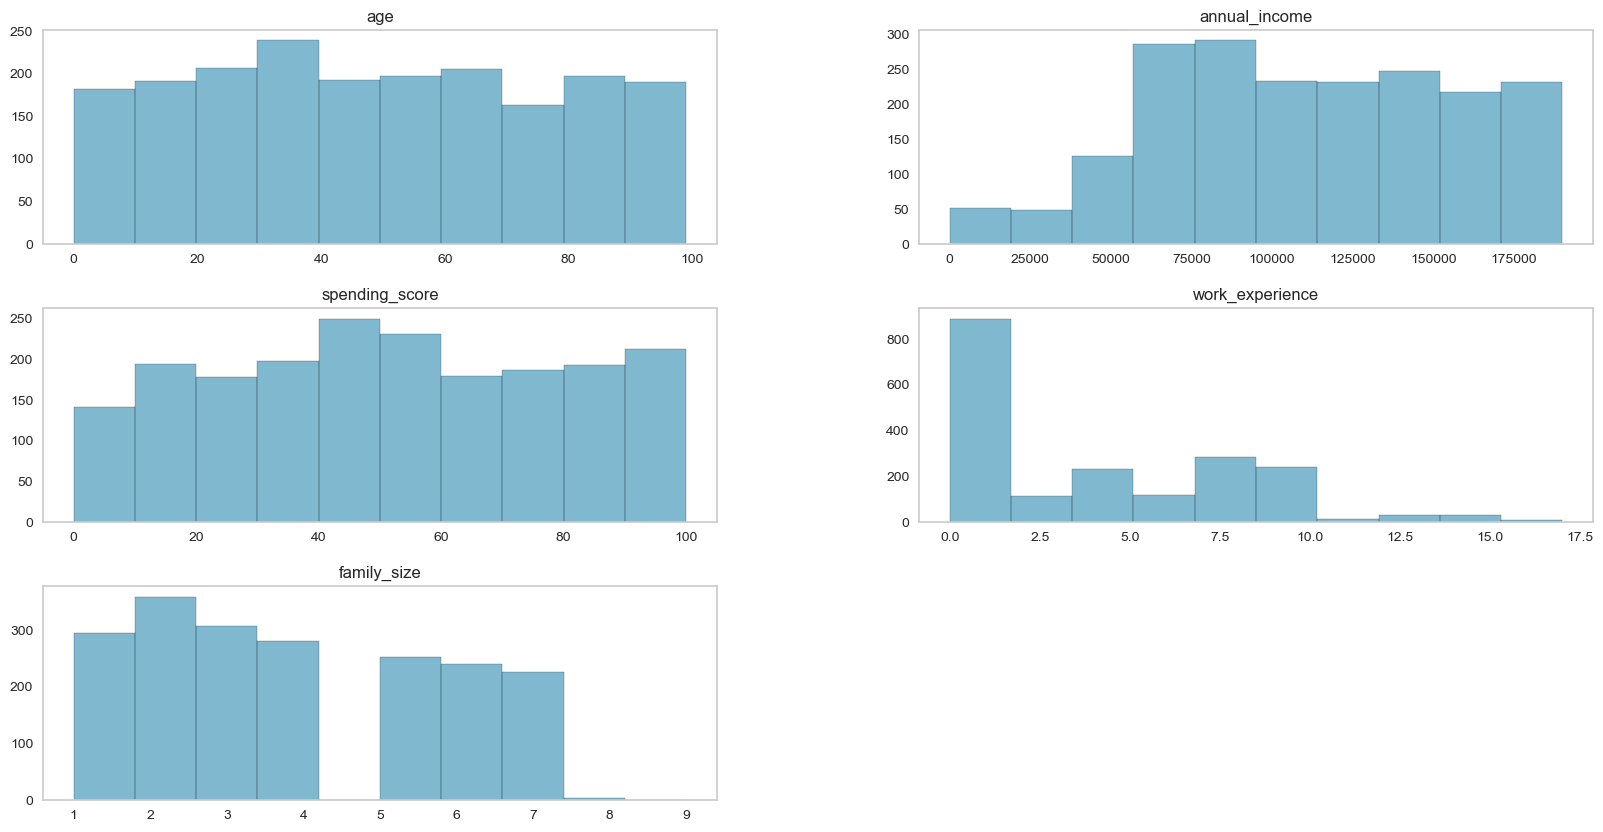

In [13]:
data_for_hist = data.select_dtypes(exclude = ['bool'])
data_for_hist.hist(figsize = (20, 10), alpha = 0.5, edgecolor = 'black', grid = False);

## Generate a box plot for numerical columns

In [14]:
columns = ['age', 'annual_income', 'spending_score', 'work_experience', 'family_size']
data[columns].describe()

,age,annual_income,spending_score,work_experience,family_size
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,48.894656,110616.009669,51.078880,4.092621,3.757252
std,28.414889,45833.860195,27.977176,3.926459,1.968335
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,74350.000000,28.000000,1.000000,2.000000
50%,48.000000,109759.000000,50.000000,3.000000,4.000000
75%,73.000000,149095.000000,75.000000,7.000000,5.000000
max,99.000000,189974.000000,100.000000,17.000000,9.000000


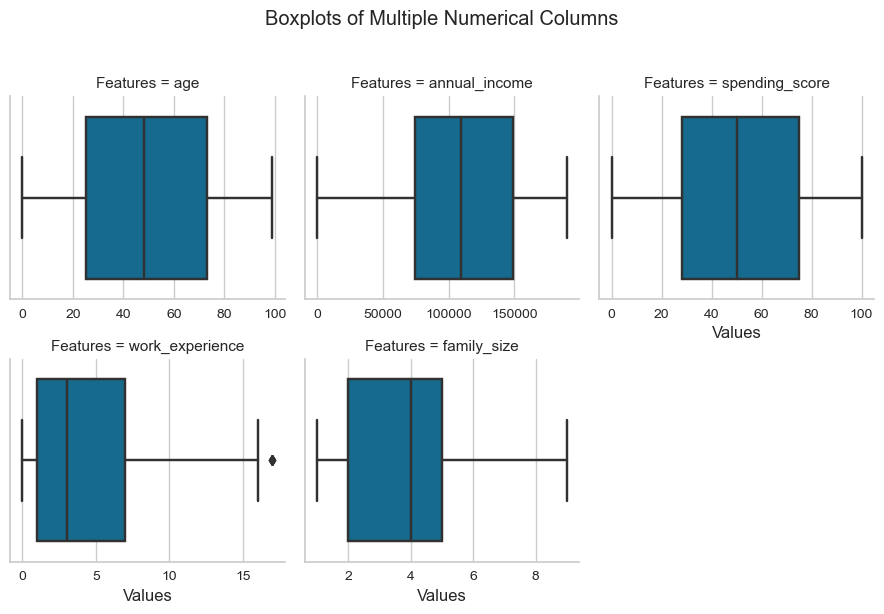

In [15]:
g = sns.FacetGrid(pd.melt(data[columns], var_name='Features'), col='Features', col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, 'value')

g.set_axis_labels('Values', '')
g.fig.suptitle('Boxplots of Multiple Numerical Columns', y=1.02)

plt.tight_layout()

plt.show()

## Identify outlier

In [16]:
for column in columns:
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1

    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr

    print(f'Column: {column}')
    print('Lower bound:', round(lb, 2))
    print('Upper bound:', round(ub, 2))
    print()
    
    num_above_ub = data[data[column] >= ub].shape[0]
    num_below_lb = data[data[column] <= lb].shape[0]
    
    print(f'Number of patients with {column} greater than UB: {num_above_ub}')
    print(f'Number of patients with {column} lower than LB: {num_below_lb}')
    print()

Column: age
Lower bound: -47.0
Upper bound: 145.0

Number of patients with age greater than UB: 0
Number of patients with age lower than LB: 0

Column: annual_income
Lower bound: -37767.5
Upper bound: 261212.5

Number of patients with annual_income greater than UB: 0
Number of patients with annual_income lower than LB: 0

Column: spending_score
Lower bound: -42.5
Upper bound: 145.5

Number of patients with spending_score greater than UB: 0
Number of patients with spending_score lower than LB: 0

Column: work_experience
Lower bound: -8.0
Upper bound: 16.0

Number of patients with work_experience greater than UB: 10
Number of patients with work_experience lower than LB: 0

Column: family_size
Lower bound: -2.5
Upper bound: 9.5

Number of patients with family_size greater than UB: 0
Number of patients with family_size lower than LB: 0



In [17]:
q1 = np.percentile(data['work_experience'], 25)
q3 = np.percentile(data['work_experience'], 75)
iqr = q3 - q1

lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

data = data[(data.work_experience < ub) & (data.work_experience > lb)]

data.shape

(1955, 7)

## Generate bar charts for categorical columns

In [18]:
columns = ['gender', 'profession']

# Calculate and print value counts for each column
for column in columns:
    value_counts = data[column].value_counts(dropna='False')
    print(f'Value counts for {column}:\n{value_counts}\n')

Value counts for gender:
Female    1160
Male       795
Name: gender, dtype: int64

Value counts for profession:
Artist           608
Healthcare       338
Entertainment    234
Engineer         178
Doctor           160
Executive        152
Lawyer           140
Marketing         85
Homemaker         60
Name: profession, dtype: int64



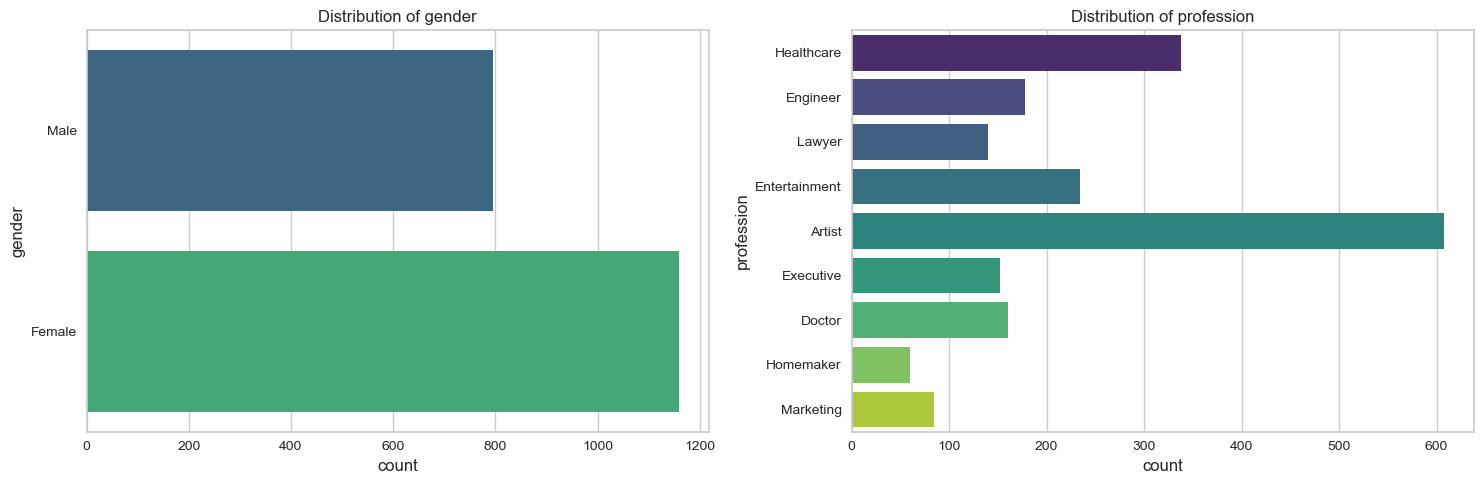

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))

for i, column in enumerate(columns):
    sns.countplot(y=data[column], ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()

plt.show()

## Check Updated Data Details

In [20]:
for column in data.columns:
    value_counts = data[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for gender:
Female    1160
Male       795
Name: gender, dtype: int64

Value counts for age:
31    31
32    30
52    29
54    28
63    27
      ..
71    12
61    11
10    11
42    11
98     9
Name: age, Length: 100, dtype: int64

Value counts for annual_income:
50000     7
9000      7
97000     6
85000     6
79000     6
         ..
144192    1
153607    1
155151    1
142723    1
110610    1
Name: annual_income, Length: 1745, dtype: int64

Value counts for spending_score:
49    34
42    32
55    31
17    30
59    27
      ..
6     12
15    12
64    11
72    10
0      2
Name: spending_score, Length: 101, dtype: int64

Value counts for profession:
Artist           608
Healthcare       338
Entertainment    234
Engineer         178
Doctor           160
Executive        152
Lawyer           140
Marketing         85
Homemaker         60
Name: profession, dtype: int64

Value counts for work_experience:
1     466
0     424
8     164
9     157
4     121
7     120
6     119
5     112


In [21]:
data

,gender,age,annual_income,spending_score,profession,work_experience,family_size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1995,Female,71,184387,40,Artist,8,7
1996,Female,91,73158,32,Doctor,7,7
1997,Male,87,90961,14,Healthcare,9,2
1998,Male,77,182109,4,Executive,7,2


In [22]:
data.shape

(1955, 7)

# Data Preprocessing

## Identify categorical features

In [23]:
categorical_columns = list(data.select_dtypes(['object']).columns)

print('The number of categorical features:',
      len(categorical_columns))
print('The names of categorical features:',
      categorical_columns)

The number of categorical features: 2
The names of categorical features: ['gender', 'profession']


In [24]:
cols = ['gender', 'profession']

encoder = ce.OneHotEncoder(cols = cols,
                           return_df = True,
                           use_cat_names = True)

In [25]:
# Fit and transform data.

data_encoded = encoder.fit_transform(data)

# Preview the data.

data_encoded.head()

,gender_Male,gender_Female,age,annual_income,spending_score,profession_Healthcare,profession_Engineer,profession_Lawyer,profession_Entertainment,profession_Artist,profession_Executive,profession_Doctor,profession_Homemaker,profession_Marketing,work_experience,family_size
0,1,0,19,15000,39,1,0,0,0,0,0,0,0,0,1,4
1,1,0,21,35000,81,0,1,0,0,0,0,0,0,0,3,3
2,0,1,20,86000,6,0,1,0,0,0,0,0,0,0,1,1
3,0,1,23,59000,77,0,0,1,0,0,0,0,0,0,0,2
4,0,1,31,38000,40,0,0,0,1,0,0,0,0,0,2,6


## Discretize `age` into bins

In [26]:
data_encoded.age.describe()

count    1955.000000
mean       48.935550
std        28.432324
min         0.000000
25%        25.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: age, dtype: float64

In [27]:
# Define age bins and labels.

bins = [0, 20, 60, 100]
labels = ['0–19', '20–59', '60-100']

# Perform binning using bin list.

data_encoded['age_group'] = pd.cut(data_encoded['age'], bins = bins, labels = labels, right = False)

# Map bins to integer values.
data_encoded['age_group_encoded'] = data_encoded['age_group'].cat.codes

In [28]:
age_vars = ['age_group_encoded', 'age_group', 'age']

data_encoded[age_vars].sample(10)

,age_group_encoded,age_group,age
623,2,60-100,79
250,2,60-100,80
656,1,20–59,30
1807,1,20–59,31
20,1,20–59,35
1715,0,0–19,5
304,2,60-100,90
785,1,20–59,30
653,1,20–59,27
1207,1,20–59,26


## Plot the new distribution of `age`

In [29]:
age_dist = data_encoded.age_group.value_counts()

age_dist

20–59     830
60-100    753
0–19      372
Name: age_group, dtype: int64

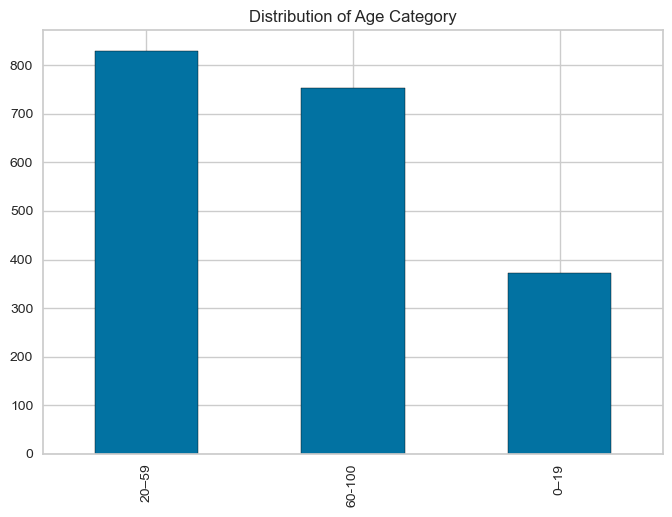

In [30]:
age_dist.plot(kind = 'bar', edgecolor = 'black')
plt.title('Distribution of Age Category');

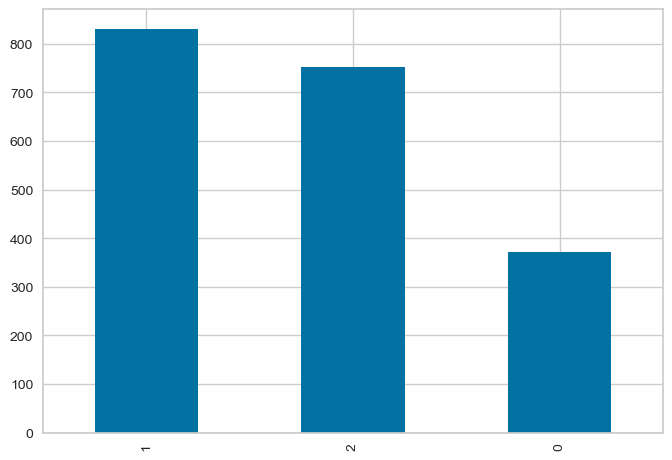

In [31]:
# Check against encoded values.
data_encoded.age_group_encoded.value_counts().plot(kind = 'bar');

## Drop the `age` and `age_group variables`

In [32]:
data_encoded.drop(['age', 'age_group'], axis = 1, inplace = True)

list(data_encoded)

['gender_Male',
 'gender_Female',
 'annual_income',
 'spending_score',
 'profession_Healthcare',
 'profession_Engineer',
 'profession_Lawyer',
 'profession_Entertainment',
 'profession_Artist',
 'profession_Executive',
 'profession_Doctor',
 'profession_Homemaker',
 'profession_Marketing',
 'work_experience',
 'family_size',
 'age_group_encoded']

In [33]:
data_encoded

,gender_Male,gender_Female,annual_income,spending_score,profession_Healthcare,profession_Engineer,profession_Lawyer,profession_Entertainment,profession_Artist,profession_Executive,profession_Doctor,profession_Homemaker,profession_Marketing,work_experience,family_size,age_group_encoded
0,1,0,15000,39,1,0,0,0,0,0,0,0,0,1,4,0
1,1,0,35000,81,0,1,0,0,0,0,0,0,0,3,3,1
2,0,1,86000,6,0,1,0,0,0,0,0,0,0,1,1,1
3,0,1,59000,77,0,0,1,0,0,0,0,0,0,0,2,1
4,0,1,38000,40,0,0,0,1,0,0,0,0,0,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1,184387,40,0,0,0,0,1,0,0,0,0,8,7,2
1996,0,1,73158,32,0,0,0,0,0,0,1,0,0,7,7,2
1997,1,0,90961,14,1,0,0,0,0,0,0,0,0,9,2,2
1998,1,0,182109,4,0,0,0,0,0,1,0,0,0,7,2,2


## Discretize `annual_income` into bins

In [34]:
data_encoded.annual_income.describe()

count      1955.000000
mean     110625.893606
std       45896.823735
min           0.000000
25%       74280.500000
50%      109759.000000
75%      149170.000000
max      189974.000000
Name: annual_income, dtype: float64

In [35]:
# Define age bins and labels.

bins = [0, 50000, 100000, 200000]
labels = ['0–49999', '50000–99999', '100000-200000']

# Perform binning using bin list.

data_encoded['annual_income_group'] = pd.cut(data_encoded['annual_income'], bins = bins, labels = labels, right = False)

# Map bins to integer values.
data_encoded['annual_income_group_encoded'] = data_encoded['annual_income_group'].cat.codes

In [36]:
age_vars = ['annual_income_group_encoded', 'annual_income_group', 'annual_income']

data_encoded[age_vars].sample(10)

,annual_income_group_encoded,annual_income_group,annual_income
979,2,100000-200000,177512
166,1,50000–99999,79000
24,1,50000–99999,67000
153,1,50000–99999,92000
161,1,50000–99999,50000
1018,2,100000-200000,106669
292,0,0–49999,38000
528,2,100000-200000,150258
936,1,50000–99999,85568
998,1,50000–99999,77976


## Plot the new distribution of `annual_income`

In [37]:
annual_income_dist = data_encoded.annual_income_group.value_counts()

annual_income_dist

100000-200000    1089
50000–99999       731
0–49999           135
Name: annual_income_group, dtype: int64

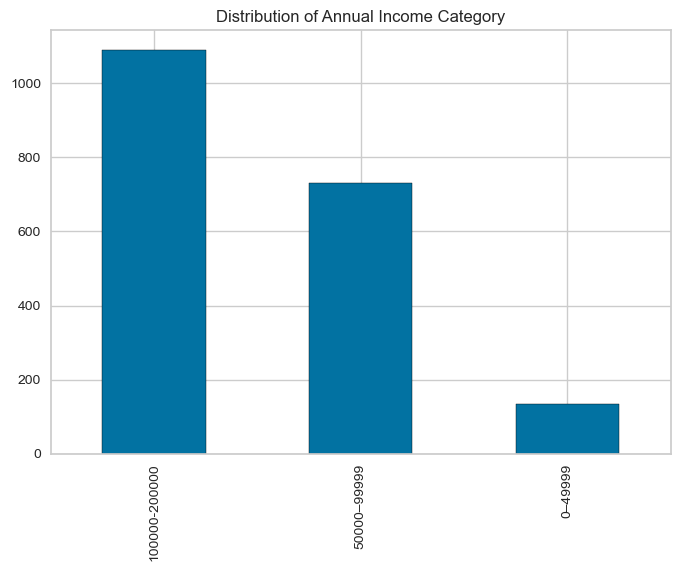

In [38]:
annual_income_dist.plot(kind = 'bar', edgecolor = 'black')
plt.title('Distribution of Annual Income Category');

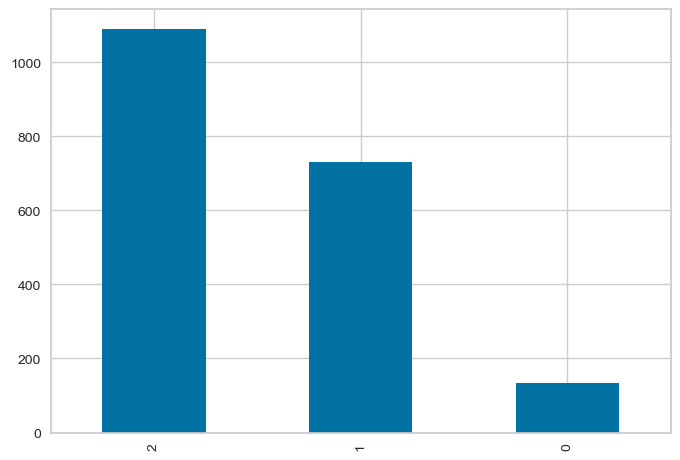

In [39]:
# Check against encoded values.
data_encoded.annual_income_group_encoded.value_counts().plot(kind = 'bar');

## Drop the `annual_income` and `annual_income_group` variables

In [40]:
data_encoded.drop(['annual_income', 'annual_income_group'], axis = 1, inplace = True)

list(data_encoded)

['gender_Male',
 'gender_Female',
 'spending_score',
 'profession_Healthcare',
 'profession_Engineer',
 'profession_Lawyer',
 'profession_Entertainment',
 'profession_Artist',
 'profession_Executive',
 'profession_Doctor',
 'profession_Homemaker',
 'profession_Marketing',
 'work_experience',
 'family_size',
 'age_group_encoded',
 'annual_income_group_encoded']

In [41]:
data_encoded

,gender_Male,gender_Female,spending_score,profession_Healthcare,profession_Engineer,profession_Lawyer,profession_Entertainment,profession_Artist,profession_Executive,profession_Doctor,profession_Homemaker,profession_Marketing,work_experience,family_size,age_group_encoded,annual_income_group_encoded
0,1,0,39,1,0,0,0,0,0,0,0,0,1,4,0,0
1,1,0,81,0,1,0,0,0,0,0,0,0,3,3,1,0
2,0,1,6,0,1,0,0,0,0,0,0,0,1,1,1,1
3,0,1,77,0,0,1,0,0,0,0,0,0,0,2,1,1
4,0,1,40,0,0,0,1,0,0,0,0,0,2,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1,40,0,0,0,0,1,0,0,0,0,8,7,2,2
1996,0,1,32,0,0,0,0,0,0,1,0,0,7,7,2,1
1997,1,0,14,1,0,0,0,0,0,0,0,0,9,2,2,1
1998,1,0,4,0,0,0,0,0,1,0,0,0,7,2,2,2


## Discretize `spending_score` into bins

In [42]:
data_encoded.spending_score.describe()

count    1955.000000
mean       51.140153
std        27.941429
min         0.000000
25%        28.000000
50%        50.000000
75%        75.000000
max       100.000000
Name: spending_score, dtype: float64

In [43]:
# Define age bins and labels.

bins = [0, 20, 40, 60, 80, 101]
labels = ['0–19', '20–39', '40-59',
          '60-79', '80-101']

# Perform binning using bin list.

data_encoded['spending_score_group'] = pd.cut(data_encoded['spending_score'], bins = bins, labels = labels, right = False)

# Map bins to integer values.
data_encoded['spending_score_group_encoded'] = data_encoded['spending_score_group'].cat.codes

In [44]:
age_vars = ['spending_score_group_encoded', 'spending_score_group', 'spending_score']

data_encoded[age_vars].sample(10)

,spending_score_group_encoded,spending_score_group,spending_score
732,4,80-101,86
1667,4,80-101,92
1965,1,20–39,34
221,2,40-59,51
656,1,20–39,28
1840,2,40-59,47
1815,2,40-59,44
1962,2,40-59,51
19,4,80-101,98
854,1,20–39,23


## Plot the new distribution of `spending_score`

In [45]:
spending_score_dist = data_encoded.spending_score_group.value_counts()

spending_score_dist

40-59     481
80-101    404
20–39     373
60-79     365
0–19      332
Name: spending_score_group, dtype: int64

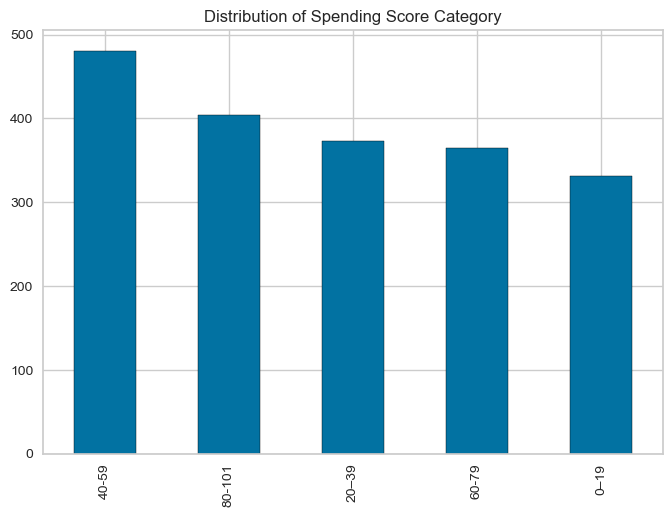

In [46]:
spending_score_dist.plot(kind = 'bar', edgecolor = 'black')
plt.title('Distribution of Spending Score Category');

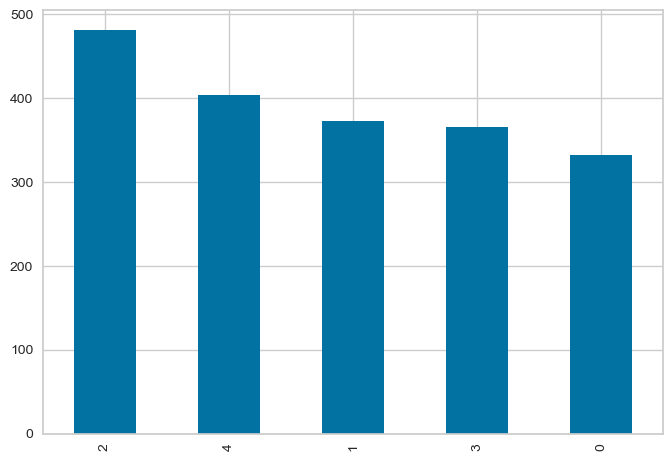

In [47]:
# Check against encoded values.
data_encoded.spending_score_group_encoded.value_counts().plot(kind = 'bar');

## Drop the `spending_score` and `spending_score_group` variables

In [48]:
data_encoded.drop(['spending_score', 'spending_score_group'], axis = 1, inplace = True)

list(data_encoded)

['gender_Male',
 'gender_Female',
 'profession_Healthcare',
 'profession_Engineer',
 'profession_Lawyer',
 'profession_Entertainment',
 'profession_Artist',
 'profession_Executive',
 'profession_Doctor',
 'profession_Homemaker',
 'profession_Marketing',
 'work_experience',
 'family_size',
 'age_group_encoded',
 'annual_income_group_encoded',
 'spending_score_group_encoded']

In [49]:
data_encoded

,gender_Male,gender_Female,profession_Healthcare,profession_Engineer,profession_Lawyer,profession_Entertainment,profession_Artist,profession_Executive,profession_Doctor,profession_Homemaker,profession_Marketing,work_experience,family_size,age_group_encoded,annual_income_group_encoded,spending_score_group_encoded
0,1,0,1,0,0,0,0,0,0,0,0,1,4,0,0,1
1,1,0,0,1,0,0,0,0,0,0,0,3,3,1,0,4
2,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0
3,0,1,0,0,1,0,0,0,0,0,0,0,2,1,1,3
4,0,1,0,0,0,1,0,0,0,0,0,2,6,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1,0,0,0,0,1,0,0,0,0,8,7,2,2,2
1996,0,1,0,0,0,0,0,0,1,0,0,7,7,2,1,1
1997,1,0,1,0,0,0,0,0,0,0,0,9,2,2,1,0
1998,1,0,0,0,0,0,0,1,0,0,0,7,2,2,2,0


## Discretize `work_experience` into bins

In [50]:
data_encoded.work_experience.describe()

count    1955.000000
mean        4.029156
std         3.834427
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        15.000000
Name: work_experience, dtype: float64

In [51]:
# Define age bins and labels.

bins = [0, 6, 11, 16]
labels = ['0–5', '6–10', '11-15']

# Perform binning using bin list.

data_encoded['work_experience_group'] = pd.cut(data_encoded['work_experience'], bins = bins, labels = labels, right = False)

# Map bins to integer values.
data_encoded['work_experience_group_encoded'] = data_encoded['work_experience_group'].cat.codes

In [52]:
bmi_vars = ['work_experience_group_encoded', 'work_experience_group', 'work_experience']

data_encoded[bmi_vars].sample(10)

,work_experience_group_encoded,work_experience_group,work_experience
438,0,0–5,1
1966,1,6–10,8
182,1,6–10,7
1445,1,6–10,8
236,0,0–5,1
1913,1,6–10,8
1659,0,0–5,1
1030,0,0–5,2
990,0,0–5,1
536,0,0–5,1


## Plot the new distribution of `work_experience`

In [53]:
work_experience_dist = data_encoded.work_experience_group.value_counts()

work_experience_dist

0–5      1237
6–10      643
11-15      75
Name: work_experience_group, dtype: int64

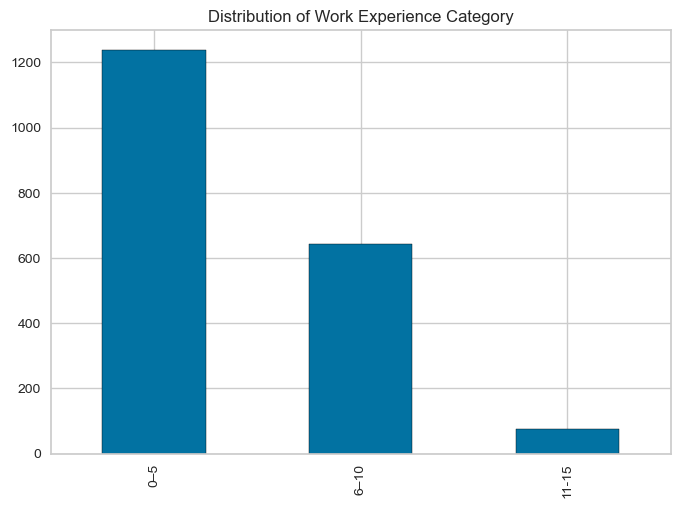

In [54]:
work_experience_dist.plot(kind = 'bar', edgecolor = 'black')
plt.title('Distribution of Work Experience Category');

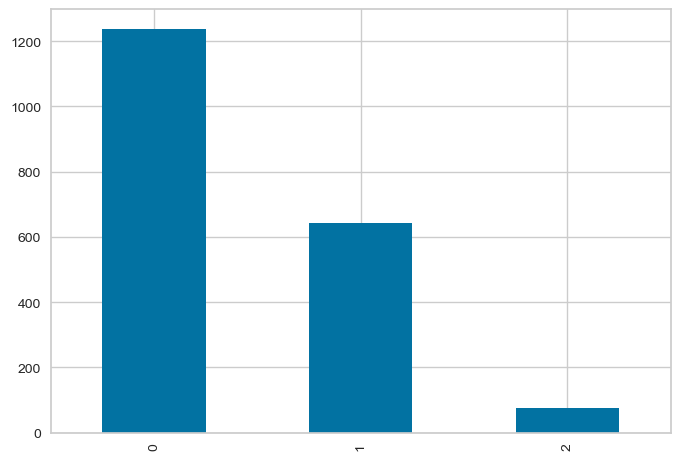

In [55]:
# Check against encoded values.
data_encoded.work_experience_group_encoded.value_counts().plot(kind = 'bar');

## Drop the `work_experience` and `work_experience_group` variables

In [56]:
data_encoded.drop(['work_experience', 'work_experience_group'], axis = 1, inplace = True)

list(data_encoded)

['gender_Male',
 'gender_Female',
 'profession_Healthcare',
 'profession_Engineer',
 'profession_Lawyer',
 'profession_Entertainment',
 'profession_Artist',
 'profession_Executive',
 'profession_Doctor',
 'profession_Homemaker',
 'profession_Marketing',
 'family_size',
 'age_group_encoded',
 'annual_income_group_encoded',
 'spending_score_group_encoded',
 'work_experience_group_encoded']

In [57]:
data_encoded

,gender_Male,gender_Female,profession_Healthcare,profession_Engineer,profession_Lawyer,profession_Entertainment,profession_Artist,profession_Executive,profession_Doctor,profession_Homemaker,profession_Marketing,family_size,age_group_encoded,annual_income_group_encoded,spending_score_group_encoded,work_experience_group_encoded
0,1,0,1,0,0,0,0,0,0,0,0,4,0,0,1,0
1,1,0,0,1,0,0,0,0,0,0,0,3,1,0,4,0
2,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0
3,0,1,0,0,1,0,0,0,0,0,0,2,1,1,3,0
4,0,1,0,0,0,1,0,0,0,0,0,6,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1,0,0,0,0,1,0,0,0,0,7,2,2,2,1
1996,0,1,0,0,0,0,0,0,1,0,0,7,2,1,1,1
1997,1,0,1,0,0,0,0,0,0,0,0,2,2,1,0,1
1998,1,0,0,0,0,0,0,1,0,0,0,2,2,2,0,1


## Discretize `family_size` into bins

In [58]:
data_encoded.family_size.describe()

count    1955.000000
mean        3.757545
std         1.969194
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         9.000000
Name: family_size, dtype: float64

In [59]:
# Define age bins and labels.

bins = [1, 3, 6, 10]
labels = ['1–2', '2-5', '6-9']

# Perform binning using bin list.

data_encoded['family_size_group'] = pd.cut(data_encoded['family_size'], bins = bins, labels = labels, right = False)

# Map bins to integer values.
data_encoded['family_size_group_encoded'] = data_encoded['family_size_group'].cat.codes

In [60]:
bmi_vars = ['family_size_group_encoded', 'family_size_group', 'family_size']

data_encoded[bmi_vars].sample(10)

,family_size_group_encoded,family_size_group,family_size
1102,2,6-9,6
1386,0,1–2,2
170,1,2-5,5
399,0,1–2,2
1269,2,6-9,6
46,1,2-5,4
147,0,1–2,1
876,1,2-5,4
1404,0,1–2,2
1871,0,1–2,2


## Plot the new distribution of `family_size`

In [61]:
family_size_dist = data_encoded.family_size_group.value_counts()

family_size_dist

2-5    836
1–2    650
6-9    469
Name: family_size_group, dtype: int64

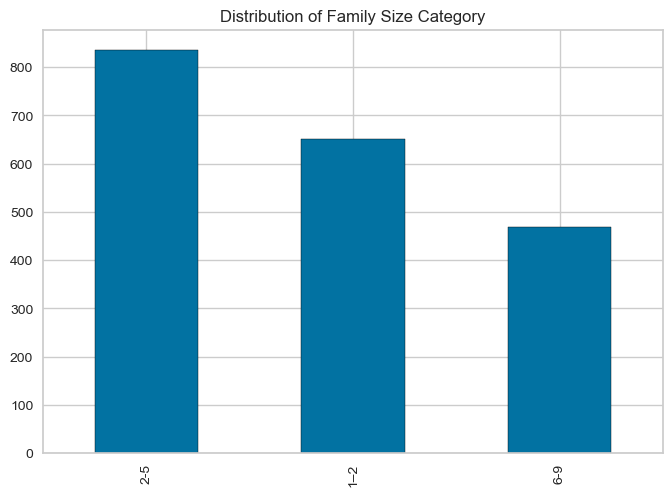

In [62]:
family_size_dist.plot(kind = 'bar', edgecolor = 'black')
plt.title('Distribution of Family Size Category');

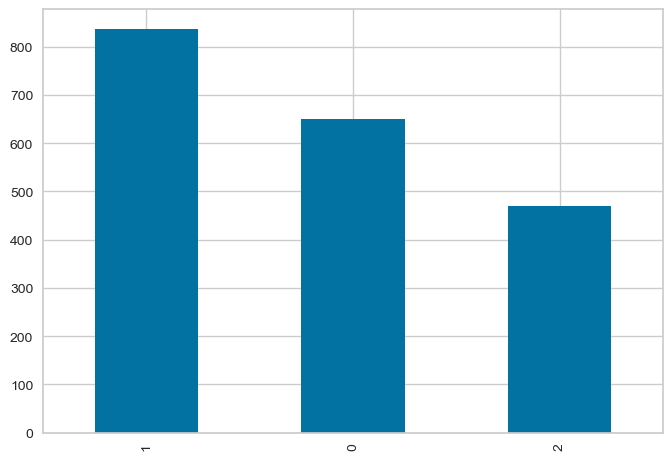

In [63]:
# Check against encoded values.
data_encoded.family_size_group_encoded.value_counts().plot(kind = 'bar');

## Drop the `family_size` and `family_size_group` variables

In [64]:
data_encoded.drop(['family_size', 'family_size_group'], axis = 1, inplace = True)

list(data_encoded)

['gender_Male',
 'gender_Female',
 'profession_Healthcare',
 'profession_Engineer',
 'profession_Lawyer',
 'profession_Entertainment',
 'profession_Artist',
 'profession_Executive',
 'profession_Doctor',
 'profession_Homemaker',
 'profession_Marketing',
 'age_group_encoded',
 'annual_income_group_encoded',
 'spending_score_group_encoded',
 'work_experience_group_encoded',
 'family_size_group_encoded']

In [65]:
data_encoded

,gender_Male,gender_Female,profession_Healthcare,profession_Engineer,profession_Lawyer,profession_Entertainment,profession_Artist,profession_Executive,profession_Doctor,profession_Homemaker,profession_Marketing,age_group_encoded,annual_income_group_encoded,spending_score_group_encoded,work_experience_group_encoded,family_size_group_encoded
0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
1,1,0,0,1,0,0,0,0,0,0,0,1,0,4,0,1
2,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0
3,0,1,0,0,1,0,0,0,0,0,0,1,1,3,0,0
4,0,1,0,0,0,1,0,0,0,0,0,1,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1,0,0,0,0,1,0,0,0,0,2,2,2,1,2
1996,0,1,0,0,0,0,0,0,1,0,0,2,1,1,1,2
1997,1,0,1,0,0,0,0,0,0,0,0,2,1,0,1,0
1998,1,0,0,0,0,0,0,1,0,0,0,2,2,0,1,0


## Filter by demographics data

In [66]:
data_demographics = data_encoded.filter(regex = 'age|annual_income|gender|profession|work_experience|family_size')

data_demographics.head(n = 3) 

,gender_Male,gender_Female,profession_Healthcare,profession_Engineer,profession_Lawyer,profession_Entertainment,profession_Artist,profession_Executive,profession_Doctor,profession_Homemaker,profession_Marketing,age_group_encoded,annual_income_group_encoded,work_experience_group_encoded,family_size_group_encoded
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0


## Standardize the demographics data

In [67]:
data_demographics.describe()

,gender_Male,gender_Female,profession_Healthcare,profession_Engineer,profession_Lawyer,profession_Entertainment,profession_Artist,profession_Executive,profession_Doctor,profession_Homemaker,profession_Marketing,age_group_encoded,annual_income_group_encoded,work_experience_group_encoded,family_size_group_encoded
count,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000
mean,0.406650,0.593350,0.172890,0.091049,0.071611,0.119693,0.310997,0.077749,0.081841,0.030691,0.043478,1.194885,1.487980,0.405627,0.907417
std,0.491334,0.491334,0.378249,0.287752,0.257909,0.324685,0.463020,0.267845,0.274193,0.172522,0.203983,0.733309,0.623026,0.563900,0.751063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000


In [68]:
scaler = StandardScaler()
        
scaler.fit(data_demographics)
data_scaled = scaler.transform(data_demographics)

print('New standard deviation: ', data_scaled.std())
print('New mean:               ', round(data_scaled.mean()))

New standard deviation:  1.0
New mean:                0


# Dimensionality Reduction

## Perform PCA to reduce the dimensionality of the demographics dataset

In [69]:
pca = PCA(n_components = 3)

pca.fit(data_scaled)

PCA_data_scaled = pd.DataFrame(pca.transform(data_scaled), columns=(["col1","col2", "col3"]))
PCA_data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1955.0,4.088801e-16,1.418215,-1.378472,-1.194016,-1.037323,1.680708,1.944146
col2,1955.0,-9.449673e-17,1.165720,-1.785304,-0.877729,-0.481532,1.392972,2.396542
col3,1955.0,8.722775e-17,1.104448,-3.140433,-0.808196,-0.065940,0.747276,3.184283


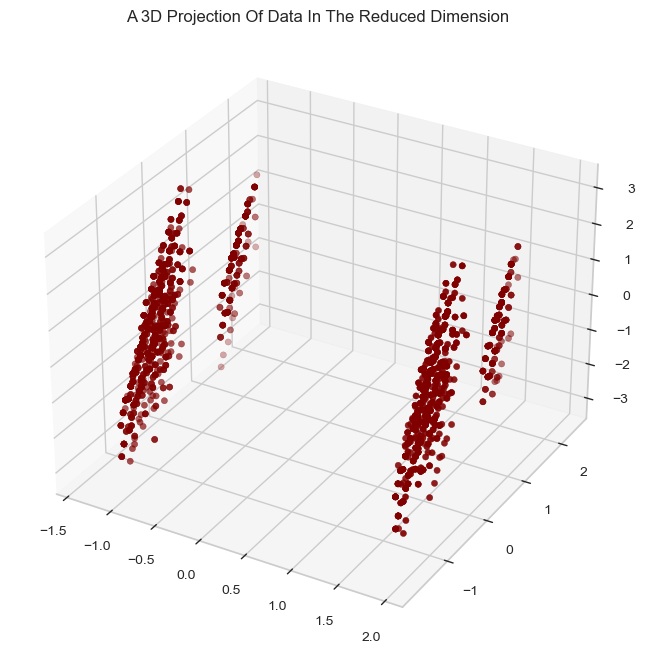

In [70]:
x =PCA_data_scaled["col1"]
y =PCA_data_scaled["col2"]
z =PCA_data_scaled["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Model Training (Clustering Analysis)

## Elbow Method to determine the number of clusters to be formed

Elbow Method to determine the number of clusters to be formed:


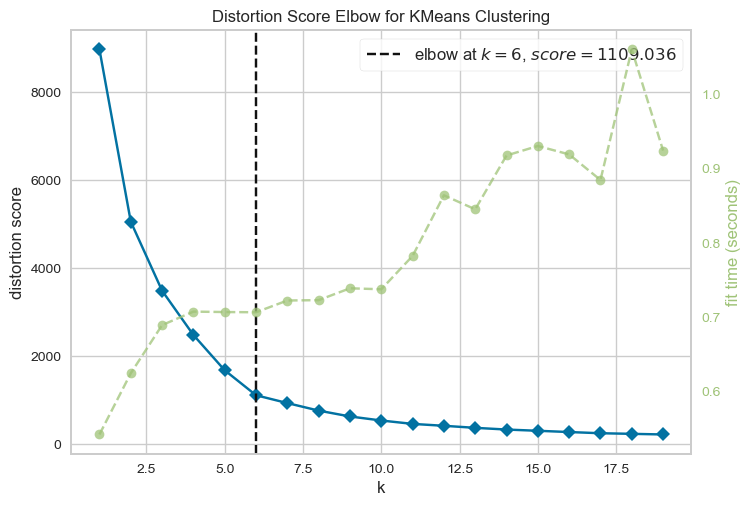

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k= (1, 20))
Elbow_M.fit(PCA_data_scaled)
Elbow_M.show()

## Initiating the K-means Clustering model

In [72]:
kmeans = KMeans(n_clusters = 6, random_state = 10)

yhat_AC = kmeans.fit_predict(PCA_data_scaled)

PCA_data_scaled["Clusters"] = yhat_AC

data["Clusters"]= yhat_AC

## Examining the clusters formed via scatter plot

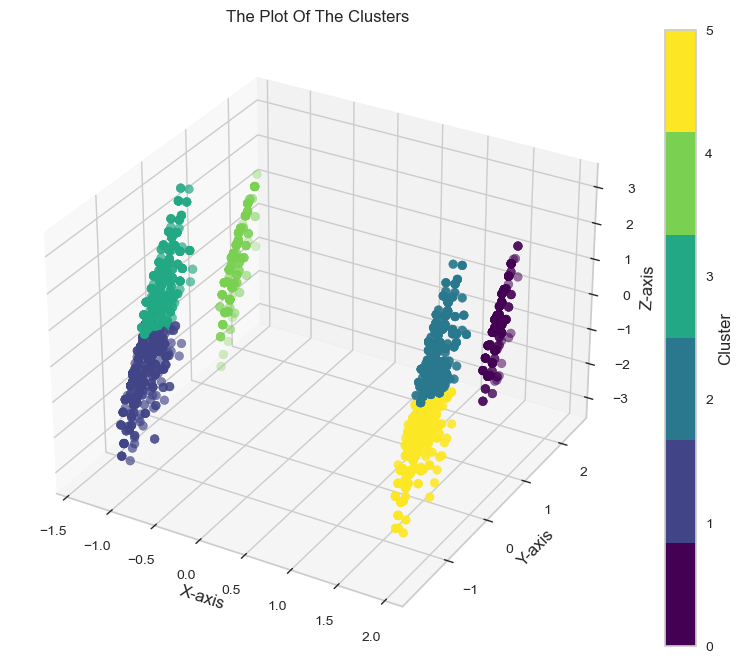

In [73]:
custom_cmap = plt.cm.get_cmap('viridis', len(PCA_data_scaled['Clusters'].unique()))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d', label="bla")
scatter = ax.scatter(x, y, z, s=40, c=PCA_data_scaled["Clusters"], cmap=custom_cmap, marker='o')

ax.set_title("The Plot Of The Clusters")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

cbar = plt.colorbar(scatter, ticks=np.arange(len(PCA_data_scaled['Clusters'].unique())))
cbar.set_label("Cluster")

plt.show()

# Model Evaluation

## Plot group distribution of clustring

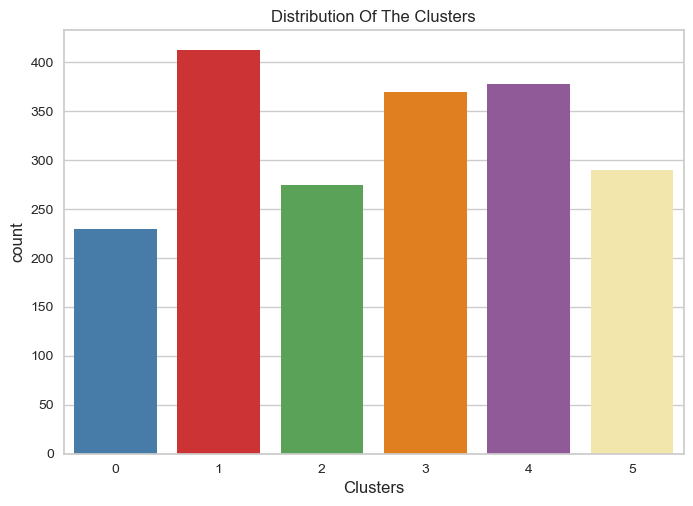

In [74]:
#Plotting countplot of clusters
pal = ["#377eb8", "#e41a1c", "#4daf4a", "#ff7f00", "#984ea3", "#ffeda0"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

# Data Profiling

## Check Updated data and Make Data Merging with data_encoded

In [75]:
data_encoded

,gender_Male,gender_Female,profession_Healthcare,profession_Engineer,profession_Lawyer,profession_Entertainment,profession_Artist,profession_Executive,profession_Doctor,profession_Homemaker,profession_Marketing,age_group_encoded,annual_income_group_encoded,spending_score_group_encoded,work_experience_group_encoded,family_size_group_encoded
0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
1,1,0,0,1,0,0,0,0,0,0,0,1,0,4,0,1
2,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0
3,0,1,0,0,1,0,0,0,0,0,0,1,1,3,0,0
4,0,1,0,0,0,1,0,0,0,0,0,1,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1,0,0,0,0,1,0,0,0,0,2,2,2,1,2
1996,0,1,0,0,0,0,0,0,1,0,0,2,1,1,1,2
1997,1,0,1,0,0,0,0,0,0,0,0,2,1,0,1,0
1998,1,0,0,0,0,0,0,1,0,0,0,2,2,0,1,0


In [76]:
data

,gender,age,annual_income,spending_score,profession,work_experience,family_size,Clusters
0,Male,19,15000,39,Healthcare,1,4,5
1,Male,21,35000,81,Engineer,3,3,2
2,Female,20,86000,6,Engineer,1,1,3
3,Female,23,59000,77,Lawyer,0,2,3
4,Female,31,38000,40,Entertainment,2,6,3
...,...,...,...,...,...,...,...,...
1995,Female,71,184387,40,Artist,8,7,4
1996,Female,91,73158,32,Doctor,7,7,1
1997,Male,87,90961,14,Healthcare,9,2,5
1998,Male,77,182109,4,Executive,7,2,5


In [77]:
combined_data = pd.merge(data, data_encoded, left_index=True, right_index=True)

In [78]:
combined_data

,gender,age,annual_income,spending_score,profession,work_experience,family_size,Clusters,gender_Male,gender_Female,profession_Healthcare,profession_Engineer,profession_Lawyer,profession_Entertainment,profession_Artist,profession_Executive,profession_Doctor,profession_Homemaker,profession_Marketing,age_group_encoded,annual_income_group_encoded,spending_score_group_encoded,work_experience_group_encoded,family_size_group_encoded
0,Male,19,15000,39,Healthcare,1,4,5,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
1,Male,21,35000,81,Engineer,3,3,2,1,0,0,1,0,0,0,0,0,0,0,1,0,4,0,1
2,Female,20,86000,6,Engineer,1,1,3,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0
3,Female,23,59000,77,Lawyer,0,2,3,0,1,0,0,1,0,0,0,0,0,0,1,1,3,0,0
4,Female,31,38000,40,Entertainment,2,6,3,0,1,0,0,0,1,0,0,0,0,0,1,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,71,184387,40,Artist,8,7,4,0,1,0,0,0,0,1,0,0,0,0,2,2,2,1,2
1996,Female,91,73158,32,Doctor,7,7,1,0,1,0,0,0,0,0,0,1,0,0,2,1,1,1,2
1997,Male,87,90961,14,Healthcare,9,2,5,1,0,1,0,0,0,0,0,0,0,0,2,1,0,1,0
1998,Male,77,182109,4,Executive,7,2,5,1,0,0,0,0,0,0,1,0,0,0,2,2,0,1,0


In [79]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1955 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   gender                         1955 non-null   object
 1   age                            1955 non-null   int64 
 2   annual_income                  1955 non-null   int64 
 3   spending_score                 1955 non-null   int64 
 4   profession                     1955 non-null   object
 5   work_experience                1955 non-null   int64 
 6   family_size                    1955 non-null   int64 
 7   Clusters                       1955 non-null   int32 
 8   gender_Male                    1955 non-null   int64 
 9   gender_Female                  1955 non-null   int64 
 10  profession_Healthcare          1955 non-null   int64 
 11  profession_Engineer            1955 non-null   int64 
 12  profession_Lawyer              1955 non-null   int64 
 13  pro

## Distribution Of The Annual Income Group with Cluster

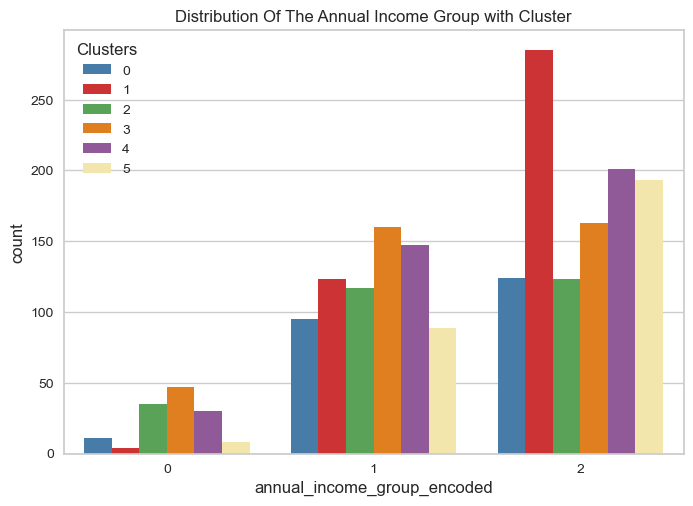

In [80]:
pal = ["#377eb8", "#e41a1c", "#4daf4a", "#ff7f00", "#984ea3", "#ffeda0"]

# Assuming "data" is your DataFrame
pl = sns.countplot(x=combined_data["annual_income_group_encoded"], hue=combined_data["Clusters"], palette=pal)

pl.set_title("Distribution Of The Annual Income Group with Cluster")
plt.show()


## Create Bar Plot Annual Income with all Categorical Columns

<Figure size 1500x800 with 0 Axes>

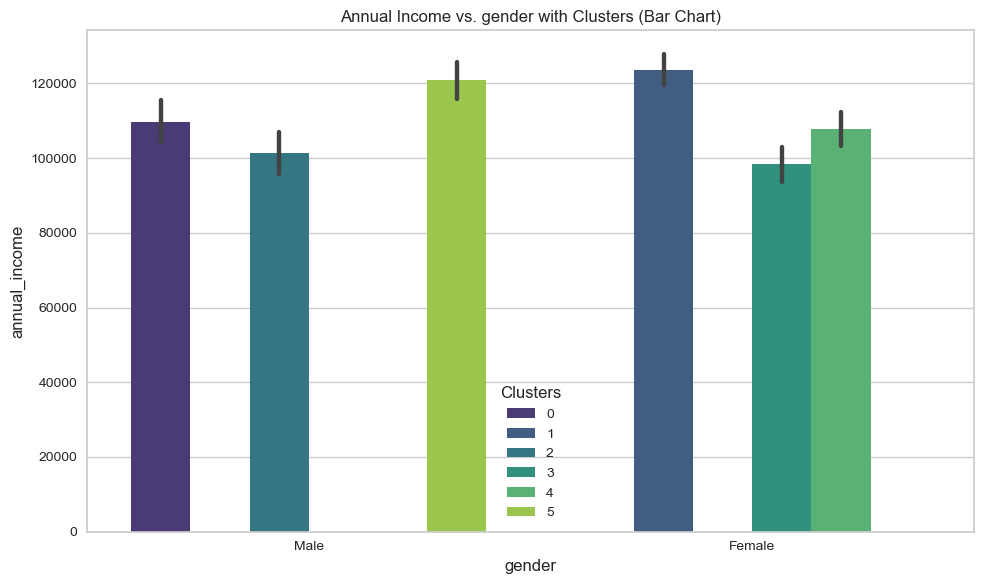

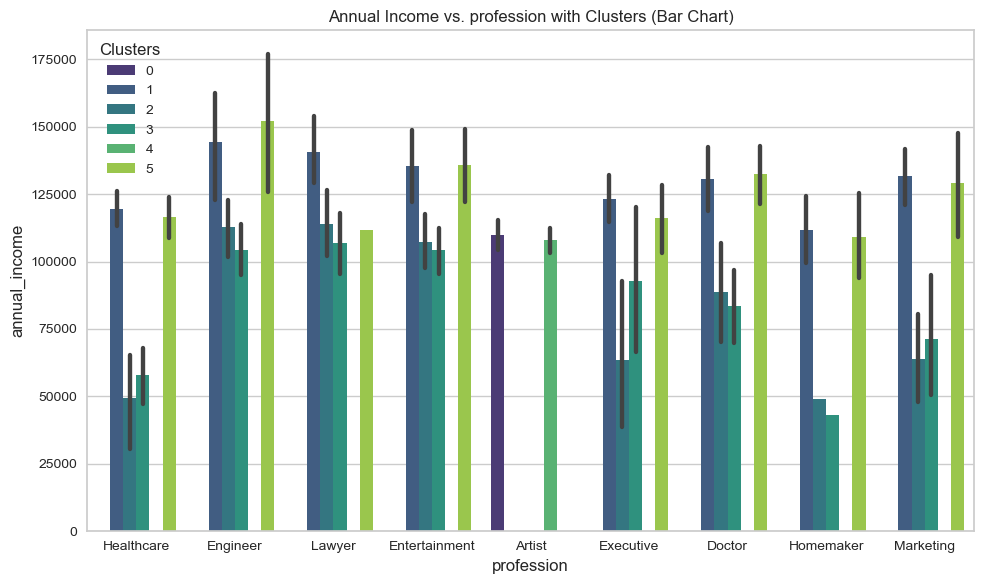

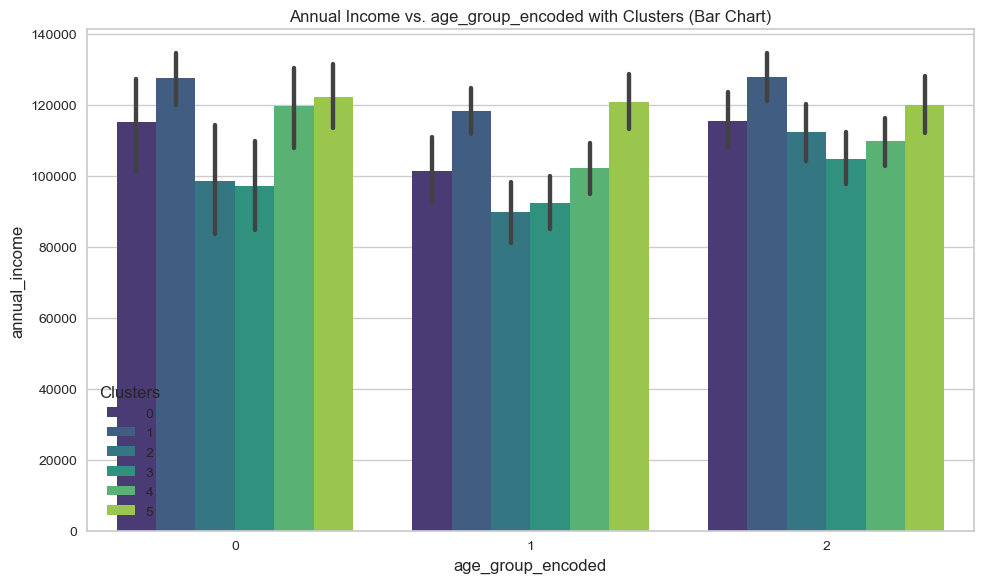

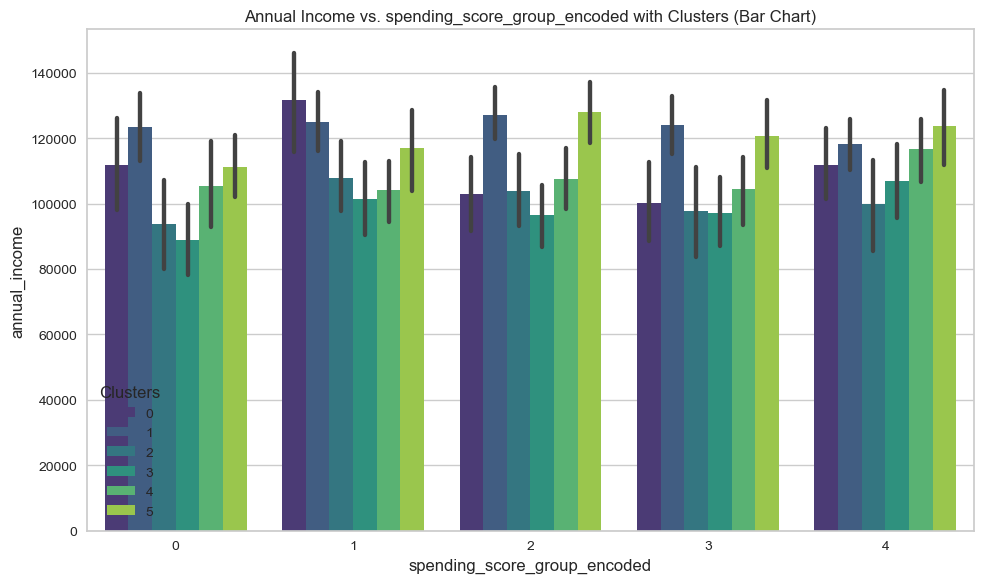

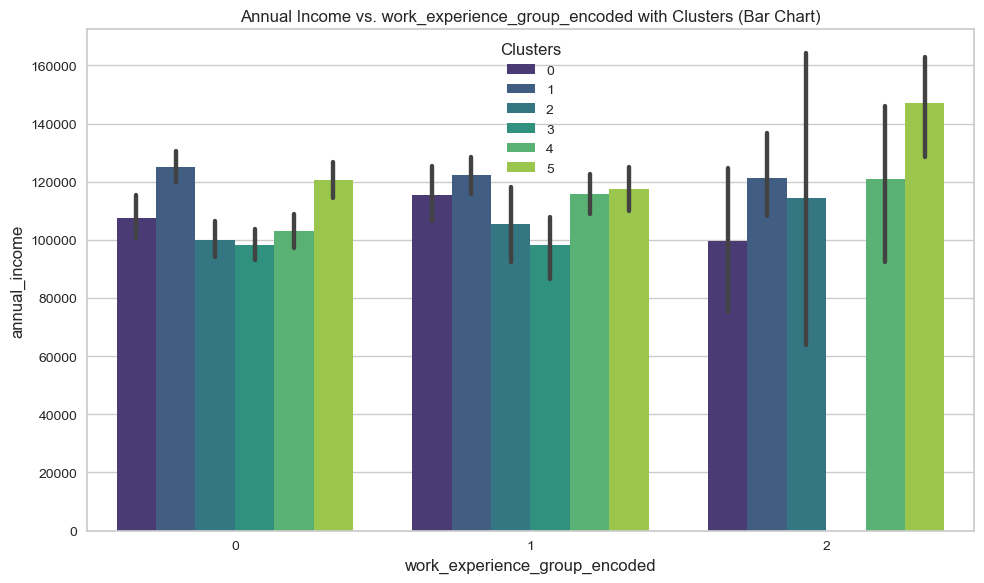

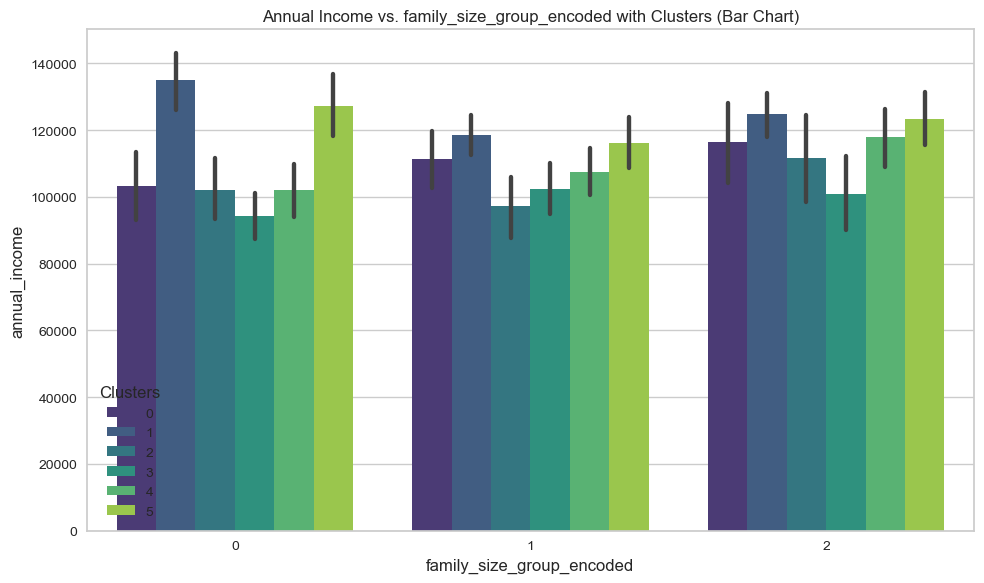

In [81]:
x_values = ['gender', 'profession', 'age_group_encoded', 
            'spending_score_group_encoded','work_experience_group_encoded', 'family_size_group_encoded']

# Set up the figure
plt.figure(figsize=(15, 8))

# Iterate over 'x' values and create bar plots
for x_value in x_values:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=combined_data[x_value], y=combined_data['annual_income'], hue=combined_data['Clusters'], palette='viridis')

    # Customize the plot
    plt.title(f'Annual Income vs. {x_value} with Clusters (Bar Chart)')
    plt.xlabel(x_value)
    plt.ylabel('annual_income')

    plt.tight_layout()
    # Show the plot
    plt.show()

## Conclusion

Conclusion on `Clusters` Profiling

- Cluster Number: 0 
  - Customer gender is male
  - Profession distributions are widely on Engineer, Lawyer, and Entertainment.
  - Age group, Spending Score, Family Size and Work Experience have balance distributions.
  
- Cluster Number: 1 
  - Customer gender is female
  - Profession distributions are widely on Engineer, Lawyer, and Entertainment.
  - Age group, Spending Score and Work Experience have balance distributions.
  - Family Size is 1 or 2.
  
- Cluster Number: 2
  - Customer gender is male
  - Profession distributions are widely on Engineer, Lawyer, Executive and Entertainment.
  - Age group above 60 years old is majority.
  - Spending Score, and Family Size have balance distributions.
  - Work Experience is distributed from 11 to 15 years experiences.
  
- Cluster Number: 3
  - Customer gender is female
  - Profession distributions are widely on Doctor, and Marketing.
  - Age group is below 20 years old
  - Spending Score and Family Size have balance distributions.
  - Work Experience is distributed from 0 to 10 years experiences.
  
- Cluster Number: 4
  - Customer gender is female
  - Profession distributions are widely on Artist.
  - Age group is below 20 years old
  - Spending Score, and Work Experience, and Family Size have balance distributions.
  
- Cluster Number: 5
  - Customer gender is male
  - Profession distributions are widely on Engineer, Doctor, Marketing and Entertainment.
  - Age group, Spending Score and Family Size have balance distributions.
  - Work Experience is distributed from 11 to 15 years experiences.
  
  
 Overall overview:
 - Cluster '1' has the highest income.
 - Female customers are distributed on Cluster '1', '3', and '4'.
 - Male customers are distributed on Cluster '0', '2', and '5'.